In [24]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [25]:
data = pd.read_csv('FastagFraudDetection.csv')
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [26]:
print(data['Timestamp'].unique())
print(data['Vehicle_Type'].unique())
print(data['Lane_Type'].unique())
print(data['Transaction_Amount'].unique())
print(data['Amount_paid'].unique())
print(data['Vehicle_Speed'].unique())
print(data['Geographical_Location'].unique())
print(data['Vehicle_Dimensions'].unique())

['1/6/2023 11:20' '1/7/2023 14:55' '1/8/2023 18:25' ... '2/5/2023 5:08'
 '2/20/2023 20:34' '3/10/2023 0:59']
['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
['Express' 'Regular']
[350 120   0 140 160 180 290 110 100 130  60 150 340 300  70 115 145 330
  90 125]
[120 100   0 160  90 180 350 140 110  60 290 130  70 190 150 340  80 300
  50 115 145 330 125]
[ 65  78  53  92  60 105  70  88  45  72  58  81  67  98  50  75  62  84
  55  80  68  90  48  77  63  87  52  95  73  82  57  96  66  89  51  76
  61  85  74  93  49  83  59  91  71  86  56  79  64  97  69  94  54  44
  47  46  40  41  42  43  38  39  37  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  10  99 111 118 102]
['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
['Large' 'Small' 'Medium']


In [27]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [28]:
def convert(x, days):
    x = x.split()
    date, time_of_the_day = x[0], x[1]
    hours = x[1].split(':')[0]
    conv = datetime.datetime.strptime(date, "%m/%d/%Y")
    day_of_week = conv.isoweekday()%7
    return [days[day_of_week], hours, date.split('/')[1]]

In [29]:
days_of_the_week = ["Sunday", "Monday", "Tuesday", "Wednesday",
                   "Thursday", "Friday", "Saturday"]

In [30]:
data["Day"] = data["Timestamp"].apply(lambda x: convert(x, days_of_the_week)[0])
data["Hour"] = data["Timestamp"].apply(lambda x: int(convert(x, days_of_the_week)[1]))
data["Month"] = data["Timestamp"].apply(lambda x: int(convert(x, days_of_the_week)[2]))

In [31]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Day,Hour,Month
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,Friday,11,6
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,Saturday,14,7
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,Sunday,18,8
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,Monday,2,9
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,Tuesday,6,10


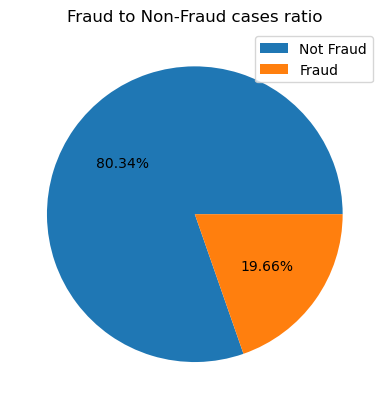

In [32]:
counts = data["Fraud_indicator"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.title("Fraud to Non-Fraud cases ratio")
plt.show()

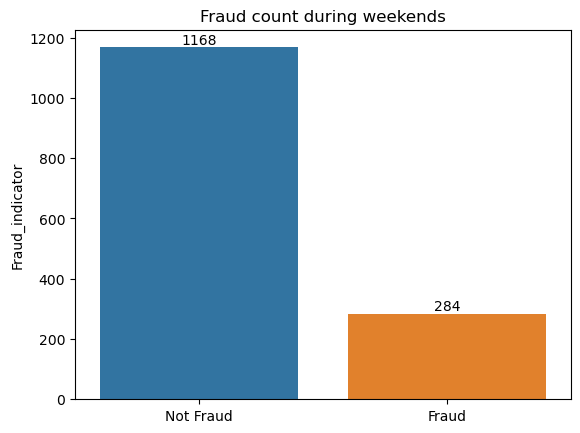

In [33]:
temp_data = data[(data["Day"] == "Sunday") | (data["Day"] == "Saturday")]
counts = temp_data["Fraud_indicator"].value_counts()
fig, axes = plt.subplots()
sns.barplot(x=counts.index, y=counts, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
    
plt.title("Fraud count during weekends")
plt.show()

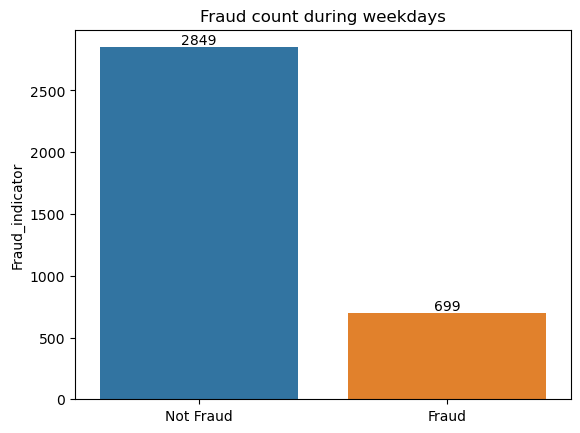

In [34]:
temp_data = data[(data["Day"] != "Sunday") & (data["Day"] != "Saturday")]
counts = temp_data["Fraud_indicator"].value_counts()
fig, axes = plt.subplots()
sns.barplot(x=counts.index, y=counts, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
    
plt.title("Fraud count during weekdays")
plt.show()

In [35]:
needed_cols = ["Vehicle_Type", "Lane_Type", "Vehicle_Dimensions", "Transaction_Amount", "Amount_paid",
              "Vehicle_Speed", "Month", "Day", "Hour", "Fraud_indicator"]
new_data = data[needed_cols].copy()

In [36]:
new_data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,Fraud_indicator
0,Bus,Express,Large,350,120,65,6,Friday,11,Fraud
1,Car,Regular,Small,120,100,78,7,Saturday,14,Fraud
2,Motorcycle,Regular,Small,0,0,53,8,Sunday,18,Not Fraud
3,Truck,Regular,Large,350,120,92,9,Monday,2,Fraud
4,Van,Express,Medium,140,100,60,10,Tuesday,6,Fraud


In [37]:
le = LabelEncoder()
categoricals = ["Vehicle_Type", "Lane_Type", "Vehicle_Dimensions"]
encoders = []
for i in categoricals:
    new_data[i] = le.fit_transform(new_data[i])
    encoders += [le]
new_data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,Fraud_indicator
0,0,0,0,350,120,65,6,Friday,11,Fraud
1,1,1,2,120,100,78,7,Saturday,14,Fraud
2,2,1,2,0,0,53,8,Sunday,18,Not Fraud
3,5,1,0,350,120,92,9,Monday,2,Fraud
4,6,0,1,140,100,60,10,Tuesday,6,Fraud


In [38]:
# Define a custom mapping dictionary
day_to_numeric = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6,'Sunday':0}
new_data['Day'] = new_data['Day'].map(day_to_numeric)
new_data['Fraud_indicator'] = new_data['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})
new_data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,Fraud_indicator
0,0,0,0,350,120,65,6,5,11,1
1,1,1,2,120,100,78,7,6,14,1
2,2,1,2,0,0,53,8,0,18,0
3,5,1,0,350,120,92,9,1,2,1
4,6,0,1,140,100,60,10,2,6,1


In [39]:
df = new_data[['Vehicle_Type','Lane_Type','Vehicle_Dimensions','Transaction_Amount','Amount_paid','Vehicle_Speed','Month','Day','Hour','Fraud_indicator']]

In [40]:
df.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,Fraud_indicator
0,0,0,0,350,120,65,6,5,11,1
1,1,1,2,120,100,78,7,6,14,1
2,2,1,2,0,0,53,8,0,18,0
3,5,1,0,350,120,92,9,1,2,1
4,6,0,1,140,100,60,10,2,6,1


In [41]:
def ImbalancePercentage(df):
  bad_count,good_count= 0.0,0.0
  for i in df['Fraud_indicator']:
    if i==0:
      bad_count+=1
    else:
      good_count+=1
  sum=bad_count+good_count
  bad_percentage = bad_count/sum
  good_percentage = good_count/sum
  return (bad_percentage-good_percentage)

In [19]:
imbalance=ImbalancePercentage(df)*100.0
print(imbalance)
if imbalance > 30:
  print("Imablance Dataset")
else:
  print("Balance Dataset")

60.68
Imablance Dataset


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud_indicator', axis=1), df['Fraud_indicator'], test_size=0.2)
X_train,y_train

(      Vehicle_Type  Lane_Type  Vehicle_Dimensions  Transaction_Amount  \
 3171             3          1                   0                 130   
 450              2          1                   2                   0   
 1372             0          0                   0                 340   
 3588             5          0                   0                 340   
 2311             1          1                   2                  90   
 ...            ...        ...                 ...                 ...   
 2071             3          1                   0                 145   
 1774             5          0                   0                 300   
 1814             1          0                   2                  70   
 2483             4          1                   1                 115   
 4386             5          0                   0                 300   
 
       Amount_paid  Vehicle_Speed  Month  Day  Hour  
 3171          130             39      6    6    11  
 4

In [44]:
training_data=X_train.assign(result=y_train)
training_data

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result
3171,3,1,0,130,130,39,6,6,11,0
450,2,1,2,0,0,45,18,6,19,0
1372,0,0,0,340,90,53,15,3,4,1
3588,5,0,0,340,340,65,27,1,1,0
2311,1,1,2,90,90,77,25,2,11,0
...,...,...,...,...,...,...,...,...,...,...
2071,3,1,0,145,145,92,12,4,22,0
1774,5,0,0,300,140,53,7,2,4,1
1814,1,0,2,70,0,45,24,0,1,1
2483,4,1,1,115,90,85,23,6,23,1


In [45]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.shape

(784, 10)

In [46]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result
1372,0,0,0,340,90,53,15,3,4,1
202,3,0,0,180,120,57,2,1,12,1
3785,6,1,1,130,100,97,7,4,17,1
4458,4,0,1,110,70,71,19,2,14,1
1225,0,1,0,340,100,83,20,3,4,1


Text(0, 0.5, 'Frequency')

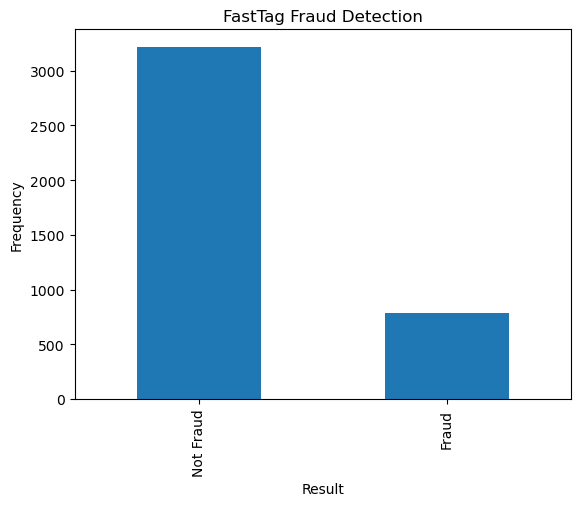

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(training_data['result'], sort = True)

count_classes.plot(kind = 'bar')

plt.title("FastTag Fraud Detection")
LABELS = ["Not Fraud", "Fraud"]
plt.xticks(range(2), LABELS)

plt.xlabel("Result")

plt.ylabel("Frequency")

In [50]:
class_majority_df=training_data[training_data['result']==0]
class_majority_df.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result
3171,3,1,0,130,130,39,6,6,11,0
450,2,1,2,0,0,45,18,6,19,0
3588,5,0,0,340,340,65,27,1,1,0
2311,1,1,2,90,90,77,25,2,11,0
4136,4,0,1,110,110,55,7,6,12,0


In [51]:
class_majority_df.to_csv('FastTag_majority_df.csv')

# k-means Clustering: